Step 1: Load the Dataset and Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load Dataset

In [3]:
# Load dataset
df = pd.read_csv("telecom.csv")

# Display first few rows
print(df.head())

# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

In [4]:
# Check data types and missing values
print(df.info())

# Check summary statistics of numerical features
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [5]:
df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

Step 2: Data Preprocessing

Drop Unused Columns
We will drop irrelevant columns like Customer_ID, as it does not contribute to predicting churn.

In [6]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "area_code"])

Handling Missing Values

In [7]:
# Check missing values
print(df.isnull().sum())

# Drop columns with too many missing values
df.dropna(axis=1, thresh=int(0.7 * len(df)), inplace=True)

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Fill missing values in numerical columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    mode_value = df[col].mode()
    if not mode_value.empty:  # Check if mode is not empty
        df[col].fillna(mode_value.iloc[0], inplace=True)  # Use the first mode value if available
    else:
        df[col].fillna("Unknown", inplace=True)  # Fallback for completely missing columns


account_length            0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


Step 3: Exploratory Data Analysis (EDA)

Target Variable Distribution (churn)

C:\Users\cheta\AppData\Local\Temp\ipykernel_15604\2089164676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="coolwarm")


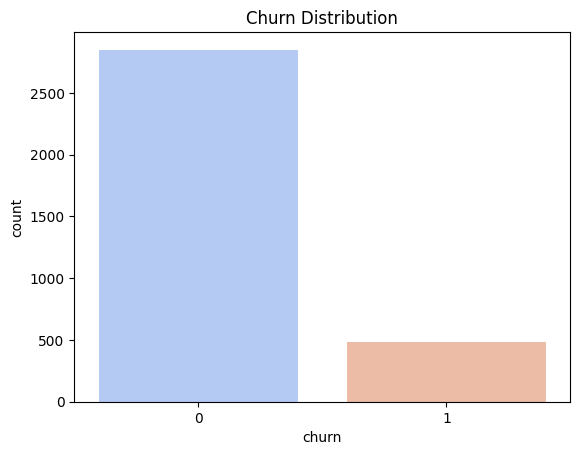

In [8]:
# Countplot for Churn
sns.countplot(x="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()

Correlation Heatmap

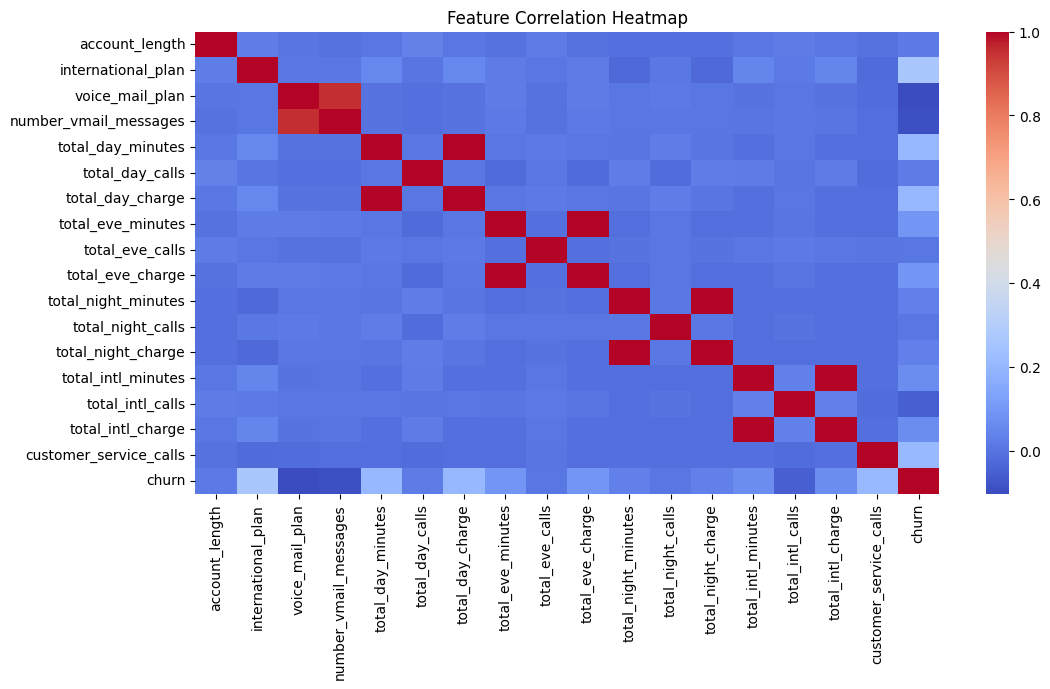

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



Step 4: Encoding Categorical Features
Categorical columns need to be converted into numerical values.

In [10]:
categorical_columns = df.select_dtypes(include=["object"]).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


Step 5: Split Data into Training and Testing Sets

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define X and y
X = df.drop(columns=["churn"])
y = df["churn"]


# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (2666, 17), Testing set: (667, 17)


Step 6: Train Decision Tree Model

In [12]:
# Create and train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("Decision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


Step 7: Model Evaluation

Model Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.89      0.66      0.76       101

    accuracy                           0.94       667
   macro avg       0.92      0.82      0.86       667
weighted avg       0.94      0.94      0.93       667



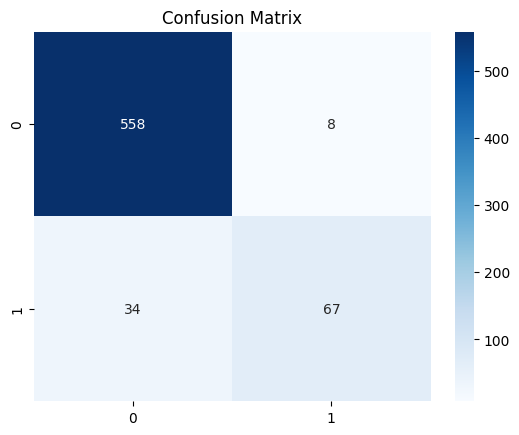

In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Print Accuracy
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


Step 8: Visualizing the Decision Tree

In [14]:
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)


|--- total_day_charge <= 44.81
|   |--- customer_service_calls <= 3.50
|   |   |--- international_plan <= 0.50
|   |   |   |--- total_day_charge <= 37.95
|   |   |   |   |--- total_eve_minutes <= 341.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_eve_minutes >  341.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- total_day_charge >  37.95
|   |   |   |   |--- total_eve_charge <= 22.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_eve_charge >  22.67
|   |   |   |   |   |--- class: 1
|   |   |--- international_plan >  0.50
|   |   |   |--- total_intl_calls <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- total_intl_calls >  2.50
|   |   |   |   |--- total_intl_minutes <= 13.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_intl_minutes >  13.10
|   |   |   |   |   |--- class: 1
|   |--- customer_service_calls >  3.50
|   |   |--- total_day_minutes <= 173.55
|   |   |   |--- total_eve_charge <= 18.01
|   |   |   |   |--- total_eve_

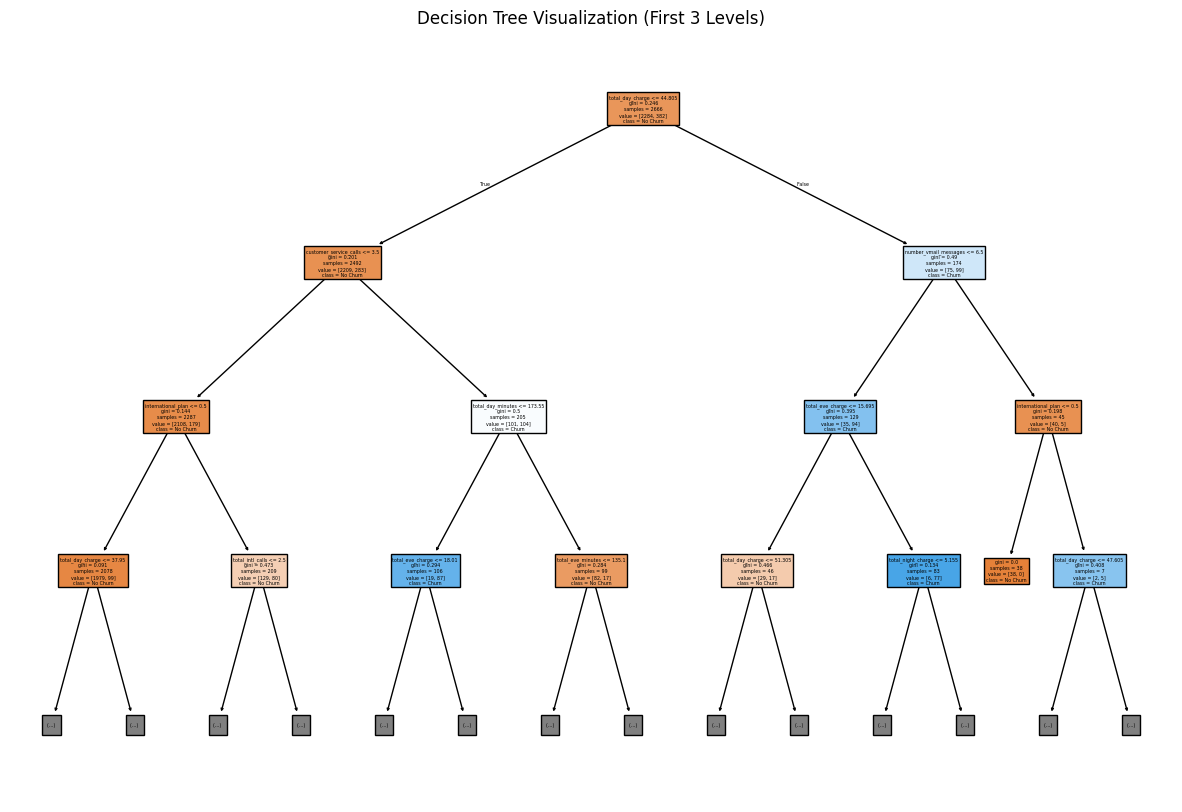

In [15]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()
